## 기본 데이터 분석
olist 데이터 셋으로 기본적인 매출 분석, 고객 분석을 진행해보겠습니다.

In [2]:
from matplotlib import pyplot as plt
import pymysql

In [16]:
conn = pymysql.connect(
    host="127.0.0.1",
    user="root",
    password="1234",
    database="olist",
)

## 매출 분석
JOIN과 GROUP BY 쿼리를 사용해서 일간, 주간, 월간 매출 추이를 집계할 수 있습니다. 

In [5]:
daily_sales_sql = """
SELECT
	DATE(orders.order_purchase_timestamp) AS dt,
	SUM(order_payments.payment_value) AS daily_sales
FROM
	orders
LEFT JOIN order_payments
ON order_payments.order_id=orders.order_id
WHERE
	orders.order_purchase_timestamp >= "2017-01-01"
    AND orders.order_purchase_timestamp <= "2017-01-31"
GROUP BY dt
ORDER BY dt
"""

In [6]:
with conn.cursor() as cursor:
    cursor.execute(daily_sales_sql)
    result = cursor.fetchall()

(array([17171., 17175., 17179., 17183., 17187., 17191., 17195.]),
 [Text(17171.0, 0, '2017-01-05'),
  Text(17175.0, 0, '2017-01-09'),
  Text(17179.0, 0, '2017-01-13'),
  Text(17183.0, 0, '2017-01-17'),
  Text(17187.0, 0, '2017-01-21'),
  Text(17191.0, 0, '2017-01-25'),
  Text(17195.0, 0, '2017-01-29')])

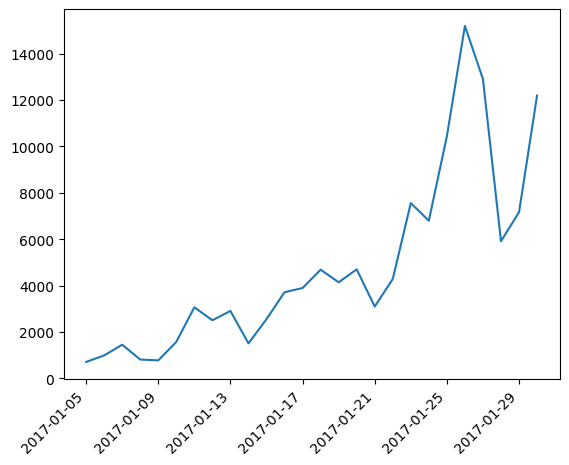

In [14]:
from matplotlib import pyplot as plt

x_dates = []
y_sales = []
for date, sales in result:
    x_dates.append(date)
    y_sales.append(sales)
plt.plot(x_dates, y_sales)
plt.xticks(rotation=45, ha='right')

In [15]:
conn.close()